# SVD-Based Face Recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This library has been used only to load
from PIL import Image
import os

#### Some constants

In [2]:
number_of_persons = 15 # Number of unique individuals
imgs_per_person = 10 # Number of images per person

#### Hyperparameters

In [3]:
N = 9 # number of images used for training in each class
threshold = 2550 # If the norm is below the threshold, only then we will declare that the input
                 # image is a valid face image
    
number_of_vectors = 1

weighted_mean = True # whether or not to take mean weighted by the singular values

In [4]:
representational_images = np.zeros((15, 64, 64))
training_images = []
for j in range(1, 16):
    person = str(j)
    np_images = np.zeros((N, 64, 64))
    for i in range(1, N+1):
        filepath = 'Dataset_Question1/'+person+'/'+str(i)+'.pgm'
        img = Image.open(filepath)
        # convert the image into a numpy array
        np_images[i-1] = np.asarray(img)
        
    training_images.append(np_images)
    
    # calculate the mean image
    mean_image = np.mean(np_images, axis=0)
    
    # center the images by subtracting the mean image
    centered_images = np_images - mean_image
    img_rows = mean_image.shape[0]
    img_columns = mean_image.shape[1]
    A = np.zeros((img_rows*img_columns, N))
    # Each column of matrix A stores a reshaped image
    for i in range(N):
        A[:,i] = centered_images[i].reshape((img_rows*img_columns, ))
        
    # Perform SVD to obtain the singular values and vectors
    u, s, vh = np.linalg.svd(A, full_matrices=False)
    
    if weighted_mean:
        rep_image = np.average(u[:, :number_of_vectors], axis=1, weights=s[:number_of_vectors]).reshape((img_rows, img_columns))
    else:
        rep_image = np.mean(u[:, :number_of_vectors], axis=1).reshape((img_rows, img_columns))

    # add the mean image back to get the representative image
    representational_images[j-1] = rep_image + mean_image

#### Testing the model on a few images

In [5]:
# The 10th image was not used anywhere for training

test_images = np.zeros((15, 64, 64)) # placeholder for the test images.
for j in range(1, 16):
    person = str(j)
    filepath = 'Dataset_Question1/'+person+'/'+str(10)+'.pgm'
    img = Image.open(filepath)
    # convert the image into a numpy array
    test_images[j-1] = np.asarray(img)

In [6]:
# Person 1: Let us calculate their distance from all 15 representative images

diff_norms = []
print("True Label = Person {}".format(1))
for j in range(1,16):
    # Distance of an image from each of the representative images
    diff_norms.append(np.linalg.norm(representational_images[j-1] - test_images[0]))   
if min(diff_norms)<=threshold:
    print('Matched with Person {}'.format(np.argmin(diff_norms) + 1))
    print("Value of the minimum norm = {}".format(round(min(diff_norms), 3)))
else:
    print('Not Found')

True Label = Person 1
Matched with Person 1
Value of the minimum norm = 2155.465


In [7]:
# Person 2: Let us calculate their distance from all 15 representative images
diff_norms = []
print("True Label = Person {}".format(2))
for j in range(1,16):
    # Distance of an image from each of the representative images
    diff_norms.append(np.linalg.norm(representational_images[j-1] - test_images[1]))
if min(diff_norms)<=threshold:
    print('Matched with Person {}'.format(np.argmin(diff_norms) + 1))
    print("Value of the minimum norm = {}".format(round(min(diff_norms), 3)))
else:
    print('Not Found')

True Label = Person 2
Matched with Person 2
Value of the minimum norm = 1768.264


In [8]:
# Person 3: Let us calculate their distance from all 15 rep images
diff_norms = []
print("True Label = Person {}".format(3))
for j in range(1,16):
    # Distance of an image from each of the representative images
    diff_norms.append(np.linalg.norm(representational_images[j-1] - test_images[2]))
if min(diff_norms)<=threshold:
    print('Matched with Person {}'.format(np.argmin(diff_norms) + 1))
    print("Value of the minimum norm = {}".format(round(min(diff_norms), 3)))
else:
    print('Not Found')

True Label = Person 3
Matched with Person 3
Value of the minimum norm = 1666.553


### Evaluating on the Training Set

In [9]:
correct_predictions = 0
not_found = 0

for i in range(number_of_persons): # loop over all the persons
    for k in range(N):# for each image of one person
        diff_norms = []
        for j in range(number_of_persons):
            # Distance of an image from each of the representative images
            diff_norms.append(np.linalg.norm(representational_images[j] - training_images[i][k]))
        
        if min(diff_norms)<=threshold:
            if np.argmin(diff_norms) == i:
                correct_predictions = correct_predictions + 1
        else :
            not_found = not_found + 1

#### Training accuracy

In [10]:
total_training_images = N * number_of_persons
training_accuracy = (correct_predictions/total_training_images) * 100
print("Training set accuracy = {}%".format(round(training_accuracy, 3)))

Training set accuracy = 99.259%


## Representative Images

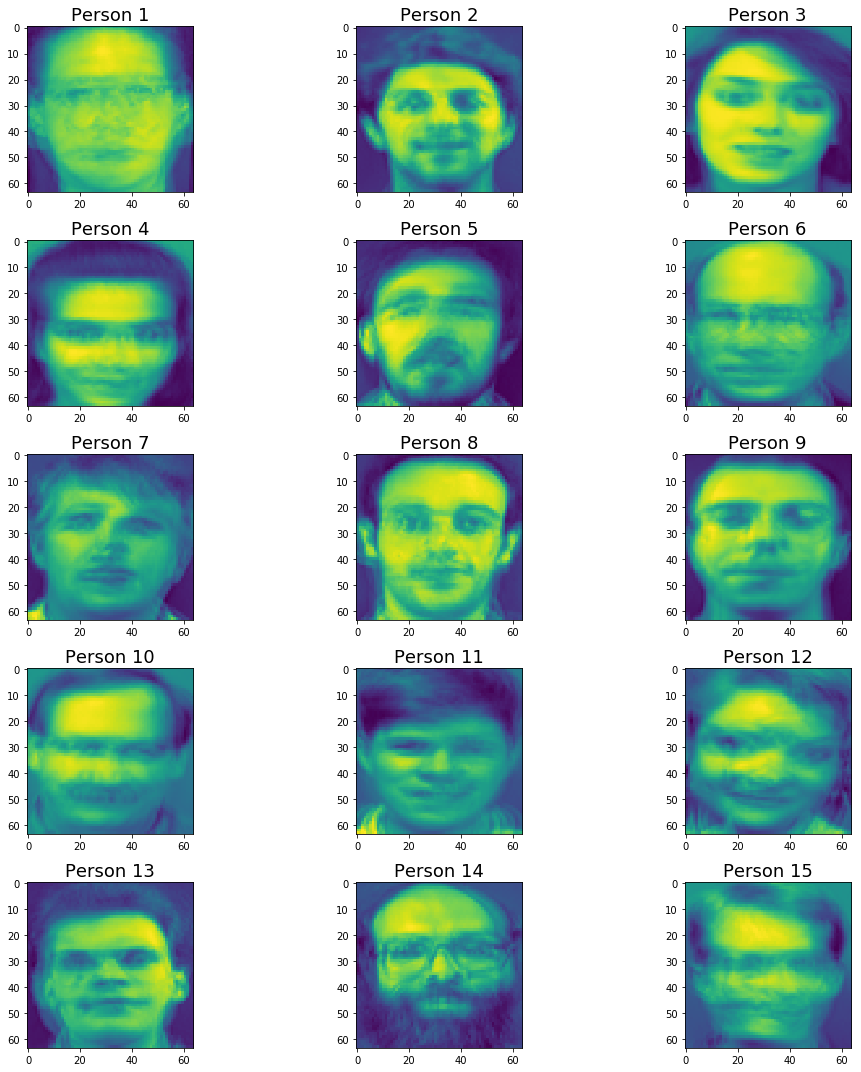

In [11]:
plt.figure(figsize=(15, 15))
# Creates the directory to store the representative images.
if not os.path.exists('RepresentativeImages'):
    os.mkdir('RepresentativeImages')
for i in range(len(representational_images)):
    plt.subplot(5, 3, i+1)
    plt.imshow(representational_images[i])
    img = Image.fromarray(representational_images[i]).convert("L")
    img.save("RepresentativeImages/Person"+str(i+1)+".pgm")
    plt.title("Person {}".format(i+1), size=18)
plt.tight_layout()

### Load the saved representative images

In [12]:
# Here we load the saved representative images
saved_rep_images = np.zeros((15, 64, 64))
for i in range(number_of_persons):
    filepath = "RepresentativeImages/Person"+str(i+1)+".pgm"
    img = Image.open(filepath)
    saved_rep_images[i] = np.asarray(img)

### Evaluating on the Test Set

In [13]:
correct_test_predictions = 0
for i in range (0,15):
    diff_norms = []
    for j in range(1,16):
        # Distance of an image from each of the representative images
        diff_norms.append(np.linalg.norm(saved_rep_images[j-1] - test_images[i]))
    print('True Label = Person {}'.format(i+1))
    if min(diff_norms)<=threshold:
        print('Matched with Person {}'.format(np.argmin(diff_norms) + 1))
        print("Value of the minimum norm = {}\n".format(round(min(diff_norms), 3)))
        if np.argmin(diff_norms) == i:
            correct_test_predictions = correct_test_predictions + 1
    else :
        print('Not Found\n')    

True Label = Person 1
Matched with Person 1
Value of the minimum norm = 2152.074

True Label = Person 2
Matched with Person 2
Value of the minimum norm = 1774.097

True Label = Person 3
Matched with Person 3
Value of the minimum norm = 1670.583

True Label = Person 4
Matched with Person 3
Value of the minimum norm = 2509.441

True Label = Person 5
Matched with Person 5
Value of the minimum norm = 1773.8

True Label = Person 6
Matched with Person 6
Value of the minimum norm = 1182.952

True Label = Person 7
Matched with Person 7
Value of the minimum norm = 1627.96

True Label = Person 8
Matched with Person 8
Value of the minimum norm = 2035.139

True Label = Person 9
Matched with Person 9
Value of the minimum norm = 1644.443

True Label = Person 10
Matched with Person 10
Value of the minimum norm = 1392.489

True Label = Person 11
Matched with Person 11
Value of the minimum norm = 1444.653

True Label = Person 12
Matched with Person 15
Value of the minimum norm = 2289.346

True Label = 

#### Test accuracy

In [14]:
test_accuracy = (correct_test_predictions/number_of_persons) * 100
print("Test set accuracy = {}%".format(round(test_accuracy, 3)))

Test set accuracy = 86.667%


## Data Augmentation

We will now try to improve the model using data augmentation. We will use 9 training images for each person and augment them to get a larger training set. We will perform data augmentation by:  
* horizontal flip
* horizontal width shift
* change in brightness

In [15]:
def augment_image(img):
    '''
    Input: image
    Output: An array containing the original image and augmented images.
    Augmentation used: Horizontal flip, width shift
    '''
    flipped_image = np.flip(img, axis=1)
    width_shift_1 = np.roll(img, 2)
    width_shift_2 = np.roll(img, -2)
    brightened_image = img + (np.ones(img.shape)*20)
    dimmed_image = img - (np.ones(img.shape)*20)
    return np.array([flipped_image, width_shift_1, width_shift_2, brightened_image, dimmed_image])

Let us see the results of augmentation on a sample image.

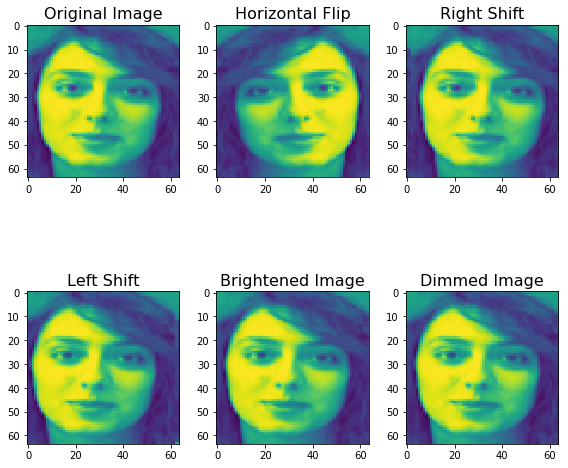

In [16]:
titles = ['Original Image', 'Horizontal Flip', 'Right Shift', 'Left Shift', 
          'Brightened Image', 'Dimmed Image']
img = np.asarray(Image.open('Dataset_Question1/3/2.pgm'))
plt.figure(figsize=(8, 8))
aug_img = augment_image(img)
imgs_to_plot = [img] + list(aug_img)
for i in range(len(imgs_to_plot)):
    plt.subplot(2, 3, i+1)
    plt.imshow(imgs_to_plot[i])
    plt.title(titles[i], size='16')
plt.tight_layout()

### Training with data augmentation

In [17]:
representational_images_2 = np.zeros((15, 64, 64))
training_images_2 = []
for j in range(1, 16):
    person = str(j)
    np_images = np.zeros((N*6, 64, 64))
    for i in range(1, N+1):
        filepath = 'Dataset_Question1/'+person+'/'+str(i)+'.pgm'
        img = Image.open(filepath)
        # convert the image into a numpy array
        np_images[(i-1)*6] = np.asarray(img)
        
    for i in range(N):
        aug_img = augment_image(np_images[i*6])
        for k in range(1, len(aug_img) + 1):
            np_images[i*6 + k] = aug_img[k-1]
    
    training_images_2.append(np_images)
    
    # calculate the mean image
    mean_image = np.mean(np_images, axis=0)
    
    # center the images by subtracting the mean image
    centered_images = np_images - mean_image
    img_rows = mean_image.shape[0]
    img_columns = mean_image.shape[1]
    A = np.zeros((img_rows*img_columns, N))
    # Each column of matrix A stores a reshaped image
    for i in range(N):
        A[:,i] = centered_images[i].reshape((img_rows*img_columns, ))
        
    # Perform SVD to obtain the singular values and vectors
    u, s, vh = np.linalg.svd(A, full_matrices=False)
    
    if weighted_mean:
        rep_image = np.average(u[:, :number_of_vectors], axis=1, weights=s[:number_of_vectors]).reshape((img_rows, img_columns))
    else:
        rep_image = np.mean(u[:, :number_of_vectors], axis=1).reshape((img_rows, img_columns))

    # add the mean image back to get the representative image
    representational_images_2[j-1] = rep_image + mean_image

### Evaluate on the training set with augmentation

In [18]:
correct_predictions = 0
not_found = 0

for i in range(number_of_persons): # loop over all the persons
    for k in range(N*6):# for each image of one person
        diff_norms = []
        for j in range(number_of_persons):
            # Distance of an image from each of the representative images
            diff_norms.append(np.linalg.norm(representational_images_2[j] - training_images_2[i][k]))
        
        if min(diff_norms)<=threshold:
            if np.argmin(diff_norms) == i:
                correct_predictions = correct_predictions + 1
        else :
            not_found = not_found + 1

### Training set accuracy

In [19]:
total_training_images = N * number_of_persons * 6# due to data augmentation
training_accuracy = (correct_predictions/total_training_images) * 100
print("Training set accuracy with data augmentation = {}%".format(round(training_accuracy, 3)))

Training set accuracy with data augmentation = 90.247%


## Representative Images (after data augmentation)

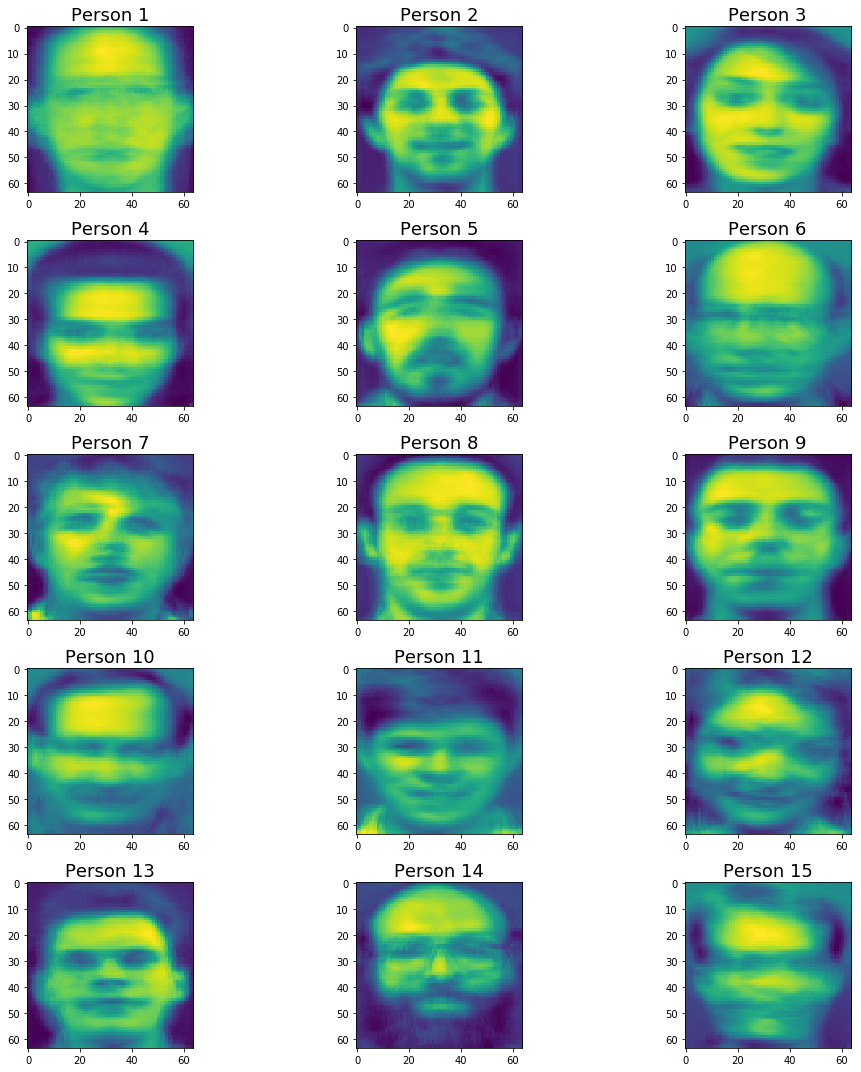

In [20]:
plt.figure(figsize=(15, 15))
# Creates the directory to store the representative images.
if not os.path.exists('RepresentativeImages2'):
    os.mkdir('RepresentativeImages2')
for i in range(len(representational_images_2)):
    plt.subplot(5, 3, i+1)
    plt.imshow(representational_images_2[i])
    img = Image.fromarray(representational_images_2[i]).convert("L")
    img.save("RepresentativeImages2/Person"+str(i+1)+".pgm")
    plt.title("Person {}".format(i+1), size=18)
plt.tight_layout()

### Load the saved representative images (formed using data augmentation)

In [21]:
# Here we load the saved representative images
saved_rep_images_2 = np.zeros((15, 64, 64))
for i in range(number_of_persons):
    filepath = "RepresentativeImages2/Person"+str(i+1)+".pgm"
    img = Image.open(filepath)
    saved_rep_images_2[i] = np.asarray(img)

### Evaluate on the test set

In [22]:
correct_test_predictions = 0
for i in range (0,15):
    diff_norms = []
    for j in range(1,16):
        # Distance of an image from each of the representative images
        diff_norms.append(np.linalg.norm(saved_rep_images_2[j-1] - test_images[i]))
    print('True Label = Person {}'.format(i+1))
    # The distance has to be less than the threshold, otherwise the image is classified as not found.
    if min(diff_norms)<=threshold:
        print('Matched with Person {}'.format(np.argmin(diff_norms) + 1))
        print("Value of the minimum norm = {}\n".format(round(min(diff_norms), 3)))
        if np.argmin(diff_norms) == i:
            correct_test_predictions = correct_test_predictions + 1
    else :
        print('Not Found\n')  

True Label = Person 1
Matched with Person 1
Value of the minimum norm = 2106.18

True Label = Person 2
Matched with Person 2
Value of the minimum norm = 1810.885

True Label = Person 3
Matched with Person 3
Value of the minimum norm = 1518.109

True Label = Person 4
Matched with Person 3
Value of the minimum norm = 2150.303

True Label = Person 5
Matched with Person 5
Value of the minimum norm = 1876.21

True Label = Person 6
Matched with Person 6
Value of the minimum norm = 1233.087

True Label = Person 7
Matched with Person 7
Value of the minimum norm = 1639.815

True Label = Person 8
Matched with Person 8
Value of the minimum norm = 2053.285

True Label = Person 9
Matched with Person 9
Value of the minimum norm = 1786.933

True Label = Person 10
Matched with Person 10
Value of the minimum norm = 1367.507

True Label = Person 11
Matched with Person 11
Value of the minimum norm = 1519.03

True Label = Person 12
Matched with Person 12
Value of the minimum norm = 2213.729

True Label = 

### Test accuracy

This is the test accuracy when we use only one image for each person in the test set. Note that this image was not used anywhere during training. It was not used for dataaugmentation also.

In [23]:
test_accuracy = (correct_test_predictions/number_of_persons) * 100
print("Test set accuracy with data augmentation = {}%".format(round(test_accuracy, 3)))

Test set accuracy with data augmentation = 93.333%


## Conclusion

The original dataset had 10 images for each class(person). We used 9 images from each class for training the SVD-based face recognition model. We used the remaining image from each class as our test set. Thus, the training set had 135 images and the test set had 15 images. We got these accuracies:  
* Training accuracy = 99.259%
* Test accuracy = 86.667%

We observed that due to the small size of our dataset, the model was overfitting the data. This is what caused the large difference between the training and test accuracy.  

In order to combat overfitting, we used data augmentation. We now had 810 training images. The performance with data augmentation is:
* Training accuracy = 90.247%
* Test accuracy = 93.333%